# Exercise 2 - (E4.8)

Let us import the required modules:

In [1]:
import numpy as np

from matplotlib import pyplot as plt

from utilities.activation_functions import hardlim

And save the problem variables:

In [2]:
# Problem data
x_data = np.array([[-1, -1], [0, 0], [-1, 1]])
y_data = np.array([0, 0, 1]).reshape(-1, 1)

# Initial weight matrix and bias
W = np.array([1, 0])
b = 0.5

x_data.shape

(3, 2)

## Point 1

We can now plot the decision boundary in a similar manner to the process described in exercise 1:

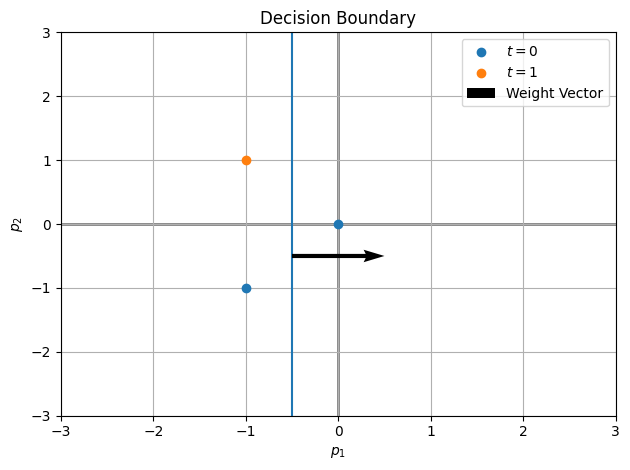

In [3]:
# Input space plot for each neuron
_, ax = plt.subplots()
ax.grid(True)

# Decision boundary (w2*p2 = -w1*p1 - b1)
p1 = -b/W[0]
ax.axvline(x=p1)

# Scatter points
ax.scatter(*list(zip(*x_data[:2])), label="$t = 0$", zorder=5)
ax.scatter(*list(zip(*x_data[2:])), label="$t = 1$", zorder=5)

# Weight vector
ax.quiver(p1, -b, W[0], W[1], angles='xy', scale_units='xy', scale=1, zorder=10, label="Weight Vector")

# Plot options
ax.set_xlabel(r"$p_1$")
ax.set_ylabel(r"$p_2$")

# Origin axis
ax.axhline(y=0, lw=2, color='k', alpha=0.5, zorder=0)
ax.axvline(x=0, lw=2, color='k', alpha=0.5, zorder=0)

# Set the limits of the plot
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])

# More options
ax.legend()
plt.title("Decision Boundary")
plt.tight_layout()
plt.show()

As can be seen, **only one sample is correctly classified**:
- The sample with $t=0$ on the _left_ of the boundary is **correctly classified**, the point sits in the area of the input space where the output is 0

- The sample with $t=0$ on the _right_ of the boundary is **misclassified**, the point is located in the area of the input space where the output is 1 (weight vector pointing towards it)

- The sample with $t=1$ is **misclassified**, the point sits in the area of the input space where the output is 0 (weight vector pointing the opposite direction)

## Point 2

To perform iterations of the perceptron learning rule we will need a way to compute the output of the network, the following function implements the network itself, and can simulate its output by taking network input $p$, weights $W$, and bias $b$ as inputs:

In [4]:
# Layer output function
def predict(p: np.ndarray, W_fun: np.ndarray, B_fun: np.ndarray):
    return hardlim(np.dot(W_fun, p.reshape(-1, 1)) + B_fun)

The code for the perceptron learning rule is recovered from that of exercise 1. Performing only one iteration would lead to the incorrect classification of one of the samples with $t=0$, thus in the following code cell we perform 2 iterations, so that the final model will be able to correctly classify each sample:

In [5]:
# Iterate the training procedure over training data
alpha = 1       # Learning rate
iterations = 2  # Number of training iterations
for _ in range(iterations):
    for i in range(len(x_data)):
        # Predict
        y_pred_step = predict(x_data[i, :], W, b)

        # Compute errors (target - prediction)
        error_step: np.ndarray = np.squeeze(y_data[i] - y_pred_step)
        print(i+1, "- Misclassification error:", error_step, "Predicted: ", y_pred_step, "Real: ", y_data[i])

        # Update weights and biases
        W += alpha*(error_step*x_data[i, :])
        b += alpha*error_step

print("\nUpdated W:\n", W, "\n\nUpdated B:\n", b)

1 - Misclassification error: 0 Predicted:  [0] Real:  [0]
2 - Misclassification error: -1 Predicted:  [1] Real:  [0]
3 - Misclassification error: 1 Predicted:  [0] Real:  [1]
1 - Misclassification error: 0 Predicted:  [0] Real:  [0]
2 - Misclassification error: -1 Predicted:  [1] Real:  [0]
3 - Misclassification error: 0 Predicted:  [1] Real:  [1]

Updated W:
 [0 1] 

Updated B:
 -0.5


## Point 3

Recalling the code to plot the decision boundaries from exercise 1:

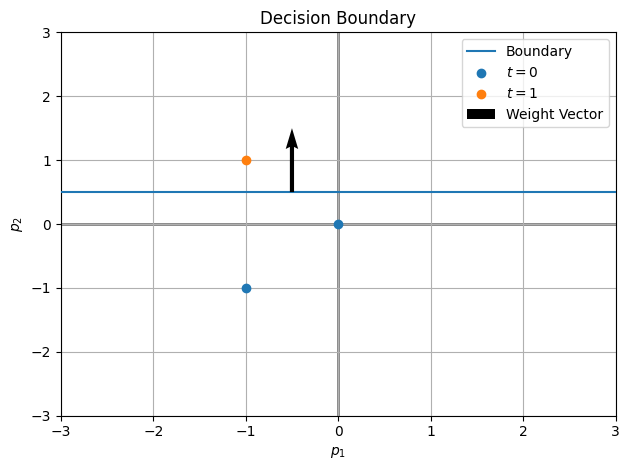

In [6]:
# Input space plot for each neuron
_, ax = plt.subplots()
ax.grid(True)

# Decision boundary (w2*p2 = -w1*p1 - b1)
p2 = (1/W[1]) * (-W[0]*p1 - b)
ax.axhline(p2, label="Boundary", zorder=5)

# Scatter points
ax.scatter(*list(zip(*x_data[:2])), label="$t = 0$", zorder=5)
ax.scatter(*list(zip(*x_data[2:])), label="$t = 1$", zorder=5)

# Weight vector
ax.quiver(p1, -b, W[0], W[1], angles='xy', scale_units='xy', scale=1, zorder=10, label="Weight Vector")

# Plot options
ax.set_xlabel(r"$p_1$")
ax.set_ylabel(r"$p_2$")

# Origin axis
ax.axhline(y=0, lw=2, color='k', alpha=0.5, zorder=0)
ax.axvline(x=0, lw=2, color='k', alpha=0.5, zorder=0)

# Set the limits of the plot
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])

# More options
ax.legend()
plt.title("Decision Boundary")
plt.tight_layout()
plt.show()

All the sample are correctly classified.

## Point 4

If given enough iterations, the perceptron rule will learn to correctly classify patterns in a training set regardless of the initial weight used, and in a finite number of steps. However, the perceptron learning algorithm is a **linear classifier**, this means, its ability to converge depends on whether the data is separable by a hyperplane.

If the data is linearly separable, **the perceptron will always converge**. But if the data is not linearly separable (e.g. XOR gate), the perceptron will not converge.